In [1]:
# Import all necessary packages / modules

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Import Data frame from CSV and check dataframe

air_bnb = pd.read_csv('/Users/kunalsharma/Downloads/AB_NYC_2019.csv')
air_bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
# Mapping unique counts of Column 'neighbourhood_group'

air_bnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [22]:
# Replacing values for each unique value with a number to get a int from a column of strings

air_bnb['neighbourhood_group'].replace(to_replace='Manhattan', value=1, inplace=True)
air_bnb['neighbourhood_group'].replace(to_replace='Brooklyn', value=2, inplace=True)
air_bnb['neighbourhood_group'].replace(to_replace='Queens', value=3, inplace=True)
air_bnb['neighbourhood_group'].replace(to_replace='Bronx', value=4, inplace=True)
air_bnb['neighbourhood_group'].replace(to_replace='Staten Island', value=5, inplace=True)

air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,digits
0,2539,Clean & quiet apt home by the park,2787,John,2,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,1,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,1,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4


In [23]:
# Assign new modified column in a list variable 'area'

area = air_bnb['neighbourhood_group']
area.head()

0    2
1    1
2    1
3    2
4    1
Name: neighbourhood_group, dtype: int64

In [8]:
# Assign new modified column in a list variable 'price'

price = air_bnb['price']
price.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [9]:
X = area.values.reshape(-1, 1) # values converts it into a numpy array -1 means that calculate the dimension of rows, but have 1 column
Y = price

# perform linear regression

air_bnb_fit = LinearRegression().fit(X,Y)
Y_pred = air_bnb_fit.predict(X)  # make predictions

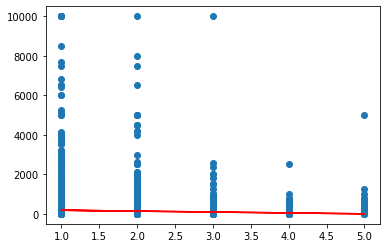

In [10]:
# Create a scatter plot of price vs area and then plot linear regression line

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [11]:
# Checking parameters for LinearRegression function

print(LinearRegression().fit(X,Y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [12]:
# Calculate r squared value to determine correlation, along with slope of linear regression line

r_sq = air_bnb_fit.score(X, Y)
print('coefficient of determination:', r_sq)

print('slope:', air_bnb_fit.coef_)

coefficient of determination: 0.023243294582333207
slope: [-45.43372854]


In [13]:
# import re
# df['digits'] = df['B'].apply(lambda x: re.findall('\d+', str(x))) Numbers
# df['digits'] = df['B'].apply(lambda x: re.findall('\D+', str(x))) Strings
# df['digits'] = df['digits'].str.get(0)
# print(df)

# Created a copy of neighbourhood column - digits

import re
air_bnb['digits'] = air_bnb['neighbourhood'].apply(lambda x: re.findall('\D+', str(x)))
air_bnb['digits'] = air_bnb['digits'].str.get(0)

air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,digits
0,2539,Clean & quiet apt home by the park,2787,John,2,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,1,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,1,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,East Harlem


In [14]:
# Series.str.replace(self, pat, repl, n=-1, case=None, flags=0, regex=True)[source]

# air_bnb['neighbourhood'].str.replace(repl)

In [25]:
# series_name = df.column.unique()
# series_dict = dict(zip(series_name, range(len(series_name))))

# Mapped index of each unique value in column - neighbourhood

neigh_ext = air_bnb['neighbourhood'].unique()
neigh_dict = dict(zip(neigh_ext, range(len(neigh_ext))))

# df.replace({'name': dict, 'variable': dict})

# df.replace({'set': mapping, 'tesst': mapping})

#air_bnb.replace({'neighbourhood':neigh_dict, 'test':neigh_dict})

In [26]:
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,digits
0,2539,Clean & quiet apt home by the park,2787,John,2,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,1,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,1,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4


In [27]:
# Reversed the dictionary mapping to extract values from mapped keys

dict2 = {v : k for k, v in neigh_dict.items()}

# df.ID = df.ID.map(dict2); df

# Assigned the values to digits column in df - air_bnb

air_bnb['digits'] = air_bnb.neighbourhood.map(neigh_dict); air_bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,digits
0,2539,Clean & quiet apt home by the park,2787,John,2,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,1,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,1,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,1,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,5
6,5121,BlissArtsSpace!,7356,Garon,2,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,6
7,5178,Large Furnished Room Near B'way,8967,Shunichi,1,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,7
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,1,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,8
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,1,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,9


In [28]:
digits = air_bnb['digits']
X = digits.values.reshape(-1, 1) # values converts it into a numpy array -1 means that calculate the dimension of rows, but have 1 column
Y = price

# perform linear regression

air_bnb_fit = LinearRegression().fit(X,Y)
Y_pred = air_bnb_fit.predict(X)  # make predictions

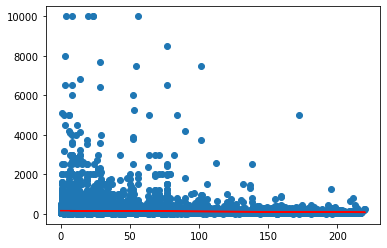

In [29]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [30]:
r_sq_n = air_bnb_fit.score(X, Y)
print('coefficient of determination:', r_sq_n)

print('slope:', air_bnb_fit.coef_)

coefficient of determination: 0.003020953733140708
slope: [-0.38064948]
